In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Classification data
heart_dis = pd.read_csv("data/heart-disease.csv")
heart_dis


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
x = heart_dis.drop("target", axis=1)

y = heart_dis["target"]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [4]:
from sklearn.ensemble import RandomForestClassifier
clf =  RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)


In [6]:
clf.fit(x_train, y_train);

In [7]:
y_pridect = clf.predict(x_test)
y_pridect

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [8]:
clf.score(x_train, y_train)

1.0

In [9]:
clf.score(x_test, y_test)

0.7377049180327869

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pridect))

              precision    recall  f1-score   support

           0       0.92      0.62      0.74        37
           1       0.61      0.92      0.73        24

    accuracy                           0.74        61
   macro avg       0.77      0.77      0.74        61
weighted avg       0.80      0.74      0.74        61



In [11]:
confusion_matrix(y_test, y_pridect)

array([[23, 14],
       [ 2, 22]], dtype=int64)

In [12]:
accuracy_score(y_test, y_pridect)

0.7377049180327869

In [13]:
np.random.seed(42)
for i in range(10, 100, 10):
    print(f'trying model with {i} estimtors')
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"model accuracy on test set{clf.score(x_test,y_test) * 100:.2f}%")
    print(' ')

trying model with 10 estimtors
model accuracy on test set75.41%
 
trying model with 20 estimtors
model accuracy on test set78.69%
 
trying model with 30 estimtors
model accuracy on test set72.13%
 
trying model with 40 estimtors
model accuracy on test set78.69%
 
trying model with 50 estimtors
model accuracy on test set77.05%
 
trying model with 60 estimtors
model accuracy on test set81.97%
 
trying model with 70 estimtors
model accuracy on test set78.69%
 
trying model with 80 estimtors
model accuracy on test set75.41%
 
trying model with 90 estimtors
model accuracy on test set80.33%
 


In [14]:
import pickle
pickle.dump(clf, open("random_forst_model_1.pkl", 'wb'))

In [15]:
loaded_model = pickle.load(open("random_forst_model_1.pkl", 'rb'))
loaded_model.score(x_test, y_test)


0.8032786885245902

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
heart_dis = pd.read_csv("data/heart-disease.csv")
heart_dis.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [18]:
x = heart_dis.drop('target', axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y = heart_dis["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((151, 13), (152, 13), (151,), (152,))

In [22]:
y_train

68     1
15     1
165    0
290    0
88     1
      ..
50     1
229    0
37     1
157    1
237    0
Name: target, Length: 151, dtype: int64

In [23]:
car_miss = pd.read_csv("data/big.csv")
car_miss

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


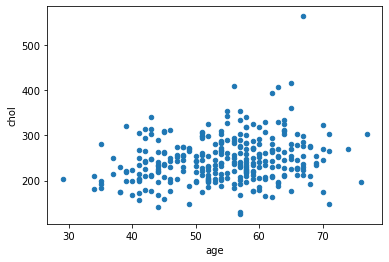

In [24]:
car_miss.plot.scatter('age', "chol");

In [25]:
import pandas as pd
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [26]:
#split x/y

In [27]:
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]
x_train, x_test, y_train, y_test = train_test_split(x,\
                                                    y,
                                                    test_size = 0.2)


In [28]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# model.fit(x_train, y_train)
# model.score(x_test, y_test)

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
cat_feature = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transfor = ColumnTransformer([("one_hot", one_hot, cat_feature)],
                            remainder = "passthrough")
transform_x = transfor.fit_transform(x)
transform_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
data = pd.DataFrame(transform_x)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [31]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [32]:
dum = pd.get_dummies(car_sales[['Make', "Colour", "Doors"]])
dum

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [33]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transform_x,
                                                    y,
                                                   test_size=0.2)
model.fit(x_train, y_train)

RandomForestRegressor()

In [34]:
model.score(x_train, y_train)

0.891612713353635

In [35]:
car_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [36]:
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
x = car_missing.drop("Price", axis=1)
y = car_missing["Price"]

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
cat_feature = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transfor = ColumnTransformer([("one_hot", one_hot, cat_feature)],
                            remainder = "passthrough")
transform_x = transfor.fit_transform(x)
transform_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [39]:
car_missing["Make"].fillna("missing", inplace=True)
car_missing["Colour"].fillna("missing", inplace=True)
car_missing["Odometer (KM)"].fillna(35431.0, inplace=True)
car_missing["Doors"].fillna(4, inplace=True)

In [40]:
car_missing


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [41]:
car_missing.dropna(inplace=True)

In [42]:
car_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [43]:
x = car_missing.drop("Price", axis=1)
y = car_missing["Price"]

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
cat_feature = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transfor = ColumnTransformer([("one_hot", one_hot, cat_feature)],
                            remainder = "passthrough")
transform_x = transfor.fit_transform(car_missing)
transform_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [45]:
data = pd.DataFrame(transform_x)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


# getting your data ready handling missing values with scikit_learn

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [47]:
car_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [66]:
car_missing.dropna(subset=['Price'], inplace=True)
car_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [67]:
x = car_missing.drop("Price", axis=1)
y = car_missing['Price']

In [68]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy='constant', fill_value="missing")
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')
cat_feature = ['Make', "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]
imputer = ColumnTransformer([
    ( "cat_imputer", cat_imputer, cat_feature),
    ("door_imputer", door_imputer, door_feature),
    ('num_imputer', num_imputer, num_feature)
])
fill_x = imputer.fit_transform(x)
fill_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [69]:
car_filled = pd.DataFrame(fill_x, columns = ['Make', "Colour", "Doors", "Odometer (KM)"])
car_filled.head(20)

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
5,Honda,Red,4.0,42652.0
6,Toyota,Blue,4.0,163453.0
7,Honda,White,4.0,130987.447894
8,missing,White,4.0,130538.0
9,Honda,Blue,4.0,51029.0


In [70]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
cat_feature = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transfor = ColumnTransformer([("one_hot", one_hot, cat_feature)],
                            remainder = "passthrough")
transform_x = transfor.fit_transform(car_filled)
transform_x.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [71]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(transform_x,
                                                   y,
                                                   test_size =0.2)
model = RandomForestRegressor(n_estimators = 100)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.21990196728583944

In [72]:

model = RandomForestRegressor(n_estimators = 10, random_state = 0)
exam = model.predict([[1.0]])
exam

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# choose the right estimator?algorithm

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

In [ ]:
house_df = pd.DataFrame(housing["data"], columns=housing['feature_names'])
house_df

In [ ]:
house_df['target'] = housing['target']
house_df = house_df.drop('MedHouseVal', axis=1)

In [ ]:
house_df

# import algorithm

In [ ]:
from sklearn.linear_model import Ridge

np.random.seed(42)

x = house_df.drop('target', axis=1)
y = house_df['target']
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2)
model = Ridge()
model.fit(x_train, y_train)
model.score(x_test, y_test)


# new choosing the right model for your data 2 (regression)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
x = house_df.drop('target', axis=1)
y = house_df['target']


In [ ]:
x_train, x_test,y_train, y_test = train_test_split(x, y ,test_size = 0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test, y_test)

In [73]:
heart_dis = pd.read_csv("data/heart-disease.csv")
heart_dis

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [74]:
from sklearn.svm import LinearSVC


np.random.seed(42)

x = heart_dis.drop('target', axis=1)
y = heart_dis['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = LinearSVC(max_iter=10000)
clf.fit(x_train, y_train)

clf.score(x_test, y_test)

C:\Users\student.ASTRUM-DOMAIN\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [75]:
boston = pd.read_csv('data/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [76]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('penguins')
df1 = pd.DataFrame(df)
df1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [77]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
df1['sex_int'] = df['sex'].map({'Male': 0, 'Female': 1})
columns = ['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'sex_int']
imputer=imputer.fit(df[columns])

df1[columns]=imputer.transform(df1[columns])
df1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_int
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,0.000000
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,1.000000
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,1.000000
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,0.495495
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,1.000000
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,NaN,0.495495
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,Female,1.000000
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,Male,0.000000
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,Female,1.000000


In [78]:
df2 = df1.drop('sex', axis=1)
df2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_int
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,0.000000
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,1.000000
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,1.000000
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,0.495495
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,1.000000
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,0.495495
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,1.000000
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,0.000000
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,1.000000


In [79]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
cat_feature = ['species', 'island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex_int']
one_hot = OneHotEncoder()
transfor = ColumnTransformer([("one_hot", one_hot, cat_feature)],
                            remainder = "passthrough")
transform_x = transfor.fit_transform(df2)
d= transform_x.toarray()
df = pd.DataFrame(d)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,396,397,398,399,400,401,402,403,404,405
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# fitting a model to the data

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)


x = heart_dis.drop('target', axis=1)
y = heart_dis['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.8524590163934426

In [81]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

# making prediction with our model

In [82]:
y_preds = clf.predict(x_test)
np.mean(y_test == y_preds)

0.8524590163934426

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [84]:
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

# making Predictions with our model (regrission)

In [85]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)


x = heart_dis.drop('target', axis=1)
y = heart_dis['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)


y_preds = model.predict(x_test)
y_preds[:10]

array([0.03, 0.58, 0.47, 0.13, 0.81, 0.86, 0.73, 0.03, 0.01, 0.45])

In [86]:
np.array(y_test[:10])

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [87]:
df = pd.read_csv('data/iris.csv')
df

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


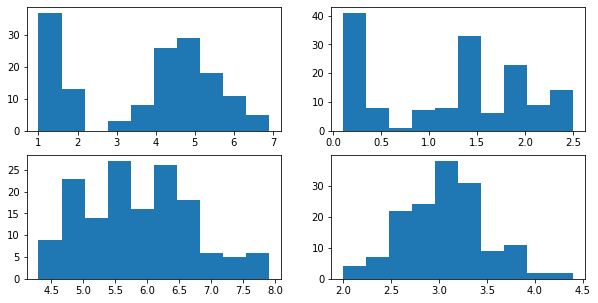

In [88]:
fig, ax = fig ,ax =plt.subplots(nrows = 2,
                     ncols=2,
                     figsize=(10,5))
ax[0,0].hist(df['petal-length']);
ax[0,1].hist(df['petal-width']);
ax[1,0].hist(df['sepal-length']);
ax[1,1].hist(df['sepal-width']);

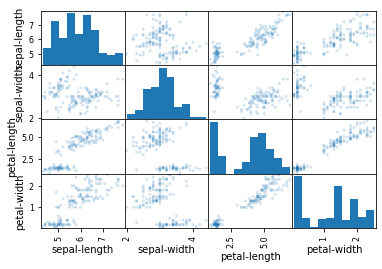

In [89]:
pd.plotting.scatter_matrix(df, alpha=0.2);

In [90]:
from sklearn.model_selection import train_test_split
x = df.drop('class', axis=1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)


In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [92]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier

# GaussianNB
model = GaussianNB()

# KNeighbors
model = KNeighborsClassifier()

# LogisticRegression
model = LogisticRegression(solver='liblinear', multi_class='ovr')

# LinearDiscriminant
model = LinearDiscriminantAnalysis()

# SVM
model = SVC(gamma='auto')
kfold = KFold(n_splits=2)

In [93]:
model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)
cv_results = cross_val_score(model1, x_train, y_train, cv=kfold, scoring='accuracy')
# print(cv_results.mean())
print('DecisionTreeClassifier:', cv_results.mean(), cv_results.std())

DecisionTreeClassifier: 0.9166666666666667 0.04999999999999999


In [94]:
model2 = GaussianNB()
cv_results = cross_val_score(model2, x_train, y_train, scoring='accuracy')
print( cv_results.mean(), cv_results.std())

0.9416666666666668 0.03333333333333335


In [95]:
model3 = KNeighborsClassifier()
cv_results = cross_val_score(model3, x_train, y_train, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.9416666666666668 0.03333333333333335


In [96]:
model4 = LogisticRegression(solver='liblinear', multi_class='ovr')
cv_results = cross_val_score(model4, x_train, y_train, scoring='accuracy')
print( cv_results.mean(), cv_results.std())

0.9333333333333332 0.042491829279939886


In [97]:
model5 = LinearDiscriminantAnalysis()
cv_results = cross_val_score(model5, x_train, y_train, scoring='accuracy')
print( cv_results.mean(), cv_results.std())

0.975 0.020412414523193135


In [98]:
model6 = SVC(gamma='auto')
cv_results = cross_val_score(model6, x_train, y_train, scoring='accuracy')
print( cv_results.mean(), cv_results.std())

0.975 0.020412414523193135


In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x = house_df.drop('target', axis=1)
y = house_df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_preds = model.predict(x_test)
y_preds[:10]

NameError: name 'house_df' is not defined

In [100]:
np.array(y_test[:10])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [101]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

ValueError: Found input variables with inconsistent numbers of samples: [30, 61]

In [102]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Make the data
heart_disease = pd.read_csv('data/heart-disease.csv')
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [103]:
clf.score(X_train, y_train)

1.0

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x = house_df.drop('target', axis=1)
y = house_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=1000)

model.fit(x_train, y_train)

NameError: name 'house_df' is not defined

In [ ]:
model.score(x_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(42)

# Make the data
heart_disease = pd.read_csv('data/heart-disease.csv')
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)


In [ ]:
cross_val_score(clf, X, y, cv=5)

In [105]:
cross_val_score(clf, X, y, cv=10, scoring=None)

array([0.87096774, 0.83870968, 0.83870968, 0.9       , 0.9       ,
       0.76666667, 0.76666667, 0.83333333, 0.73333333, 0.83333333])

In [106]:
np.random.seed(42)
clf_single = clf.score(X_test, y_test)
clf_cross = np.mean(cross_val_score(clf, X, y, cv=5))
clf_single, clf_cross

(0.8688524590163934, 0.8215300546448088)

In [107]:
boston = pd.read_csv("data/boston.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']
clf = RandomForestClassifier(n_estimators=100)
# clf.fit(x,y)
np.mean(cross_val_score(clf, x, y, cv=5))


0.8248087431693989

# evaluating a classification model 2 (ROC CURVE)

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [110]:
from sklearn.metrics import roc_curve
clf.fit(x_train, y_train)

y_probs = clf.predict_proba(x_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [111]:
y_probs_pos = y_probs[:,1]
y_probs_pos

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [112]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_pos)
tpr

array([0.     , 0.     , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.375  , 0.5    , 0.53125, 0.5625 , 0.59375, 0.59375, 0.625  ,
       0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625, 0.9375 ,
       0.9375 , 0.96875, 0.96875, 1.     , 1.     ])

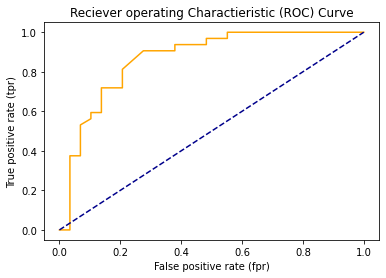

In [113]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label="ROC")
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label='guessing')
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever operating Charactieristic (ROC) Curve")
    plt.show();
plot_roc_curve(fpr, tpr)

In [114]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_pos)

0.8669181034482759

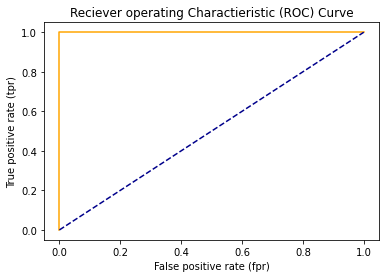

In [115]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [116]:
roc_auc_score(y_test, y_test)


1.0

In [117]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [118]:
pd.crosstab(y_test,
           y_preds,
           rownames=['actual Labels'],
           colnames=['Predicted Labels'])

Predicted Labels,0,1
actual Labels,,
0,23,6
1,6,26


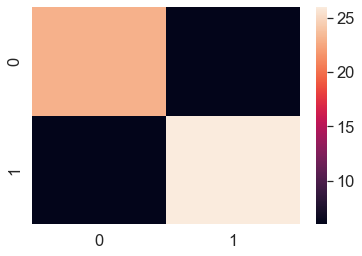

In [119]:
import seaborn as sns

sns.set(font_scale = 1.5)
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat);

# evaluating a classifier model 5

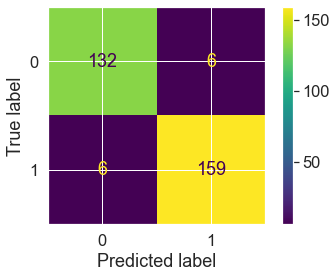

In [120]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y);

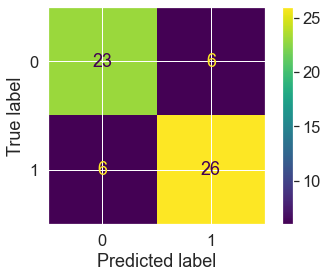

In [121]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

# Classification 

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [123]:
dis_true = np.zeros(10000)
dis_true[0] = 1
dis_preds = np.zeros(10000)


pd.DataFrame(dis_true, dis_preds).head()

,0
0.0,1.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0


In [124]:
house_df

NameError: name 'house_df' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = house_df.drop('target', axis=1)
y= house_df['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

model.score(x_test, y_test)

In [ ]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]

In [ ]:
r2_score(y_true=y_test,
        y_pred = y_test_mean)

# Evaluating A Regression Model 2 (MAE)

In [ ]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

In [ ]:
x_values = [1,2,3]
y_values = [1,5,25]

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

In [ ]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_dis.drop('target', axis=1)
y = heart_dis.target
clf = RandomForestClassifier(n_estimators=100)


In [ ]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, cv=5, scoring=None )
cv_acc

In [ ]:
print(f'cross validated accuracy is {np.mean(cv_acc)*100:.2f}%')

In [ ]:
sc_precision = cross_val_score(clf, x, y, cv=5, scoring='precision')
sc_precision

In [181]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_dis.drop('target', axis=1)
y = heart_dis['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = RandomForestClassifier()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Classifier metrics on the test set")
print(f"Acurracy {accuracy_score(y_test, y_pred)}")
print(f"prcision {precision_score(y_test, y_pred)}")
print(f"recall {recall_score(y_test, y_pred)}")
print(f"f1 {f1_score(y_test, y_pred)}")

Classifier metrics on the test set
Acurracy 0.8524590163934426
prcision 0.8484848484848485
recall 0.875
f1 0.8615384615384615


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = house_df.drop('target', axis=1)
y = house_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f"r2: {r2_score(y_test, y_pred)}")
print(f"absolute: {mean_absolute_error(y_test, y_pred)}")
print(f"square: {mean_squared_error(y_test, y_pred)}")

# hyperparamers by hand

In [184]:
def evaluate(y_true,y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metrics_dict = {'accuracy':round(accuracy, 2),
                   'precision':round(precision,2),
                   'recall':round(recall, 2),
                   'f1':round(f1, 2)}
    print(f"accuracy: {accuracy}")
    print(f"precision: {precision}")
    print(f"recall: {recall}")
    return metrics_dict

In [186]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
heart_disease = heart_dis
# Shuffle the data
heart_disease = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier
baseline_metrics = evaluate(y_valid, y_preds)
baseline_metrics

accuracy: 0.8222222222222222
precision: 0.8148148148148148
recall: 0.88


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

# HyperParameter  tuning randomizedSearchCV

In [197]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10, 100, 200, 500, 1200],
       "max_depth":[None, 5, 10, 20 ,30],
       "max_features":['auto', "sqrt"],
       "min_samples_split":[2, 4,6],
       "min_samples_leaf":[1, 2, 4]}
np.random.seed(42)

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10,
                           cv=5,
                           verbose=2)
rs_clf.fit(x_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total ti

In [199]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None}

In [200]:
y_preds = rs_clf.predict(x_test)
rs_matrics = evaluate(y_test, y_preds)

accuracy: 0.8360655737704918
precision: 0.7647058823529411
recall: 0.9285714285714286


In [167]:
heart_disease
heart_disease1 = {'age':[57],
                  'sex':[1],
                  'cp':[0],
                  'trestbps':[150],
                  'chol':[276],
                  'fbs':[0],
                  'restecg':[0],
                  'thalach':[112],
                  'exang':[1],
                  'oldpeak':[0.6],
                  'slope':[1],
                  'ca':[1],
                  'thal':[1]}
h_d = pd.DataFrame(heart_disease1)
h_d

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1


In [159]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [168]:
clf = RandomForestClassifier(n_jobs=1,
                             n_estimators = 100,
                             min_samples_split = 2,
                             min_samples_leaf = 4,
                             max_features = 'sqrt',
                             max_depth = None)
clf.fit(x_train, y_train);

data = clf.predict_proba(h_d)

data[0]
# rs_preds = rs_clf.predict(x_test)
# rs_metrics = evaluate(y_test, y_preds)

array([0.83482191, 0.16517809])

In [195]:
clf.score(x_test, y_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Hyperparameter tuning with GridSearchCV

In [173]:
grid

{'n_estimators': [10, 100, 200, 500, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [174]:
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [187]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = RandomForestClassifier(n_jobs=1)

gs_clf =GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5,
                           verbose=2)
gs_clf.fit(x_train, y_train);
gs_clf

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [188]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [194]:
y_preds = gs_clf.predict(x_test)
gs_matrics = evaluate(y_test, y_preds)

accuracy: 0.7868852459016393
precision: 0.7419354838709677
recall: 0.8214285714285714


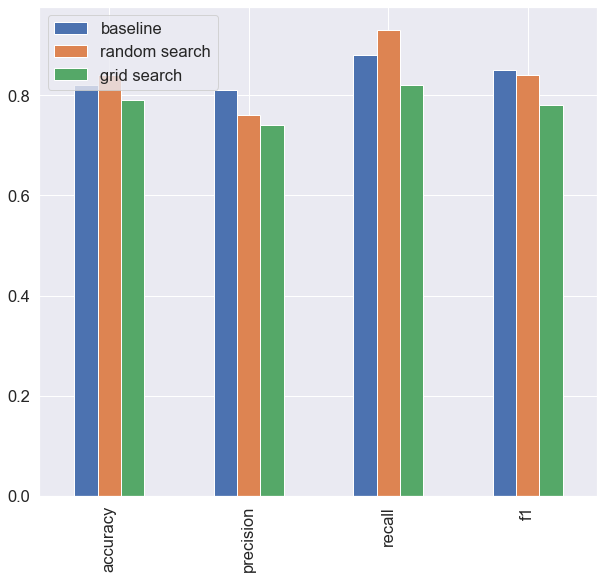

In [203]:
compare_metrics = pd.DataFrame({'baseline':baseline_metrics,
                                'random search':rs_matrics,
                                'grid search': gs_matrics})
compare_metrics.plot.bar(figsize=(10,9));

# saving and loading train machine learning models
 2 ways save and load 
    1 pickle
    2 joblib
    

In [205]:
import pickle
# save with pickle
pickle.dump(gs_clf, open("gs_Random_Forest_1.pkl", 'wb'))

In [208]:
# load with pickle
load_pickle_model = pickle.load(open('gs_Random_Forest_1.pkl', 'rb'))
preds = load_pickle_model.predict(x_test)
metrics = evaluate(y_test, preds)

accuracy: 0.7868852459016393
precision: 0.7419354838709677
recall: 0.8214285714285714


In [209]:
# 2 joblib
from joblib import dump, load

dump(gs_clf, filename='gs_random_forest_1.joblib')

['gs_random_forest_1.joblib']

In [211]:
load_jlb = load(filename='gs_random_forest_1.joblib')

In [213]:
preds = load_jlb.predict(x_test)
metrics = evaluate(y_test, preds)

accuracy: 0.7868852459016393
precision: 0.7419354838709677
recall: 0.8214285714285714


In [214]:
data = pd.read_csv('data/car-sales-extended-missing-data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [217]:
# import pandas as pd
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder

# from sklearn.ensemble import RandomForestRegressor
# from sklearn. model_selection import train_test_split, GridSearchCV
# import numpy as np

# np.random.seed(42)
# data = pd.read_csv('data/car-sales-extended-missing-data.csv')
# data.dropna(subset=['Price'], inplace=True)
# catigorical_feagure = ['Make', 'Colour']
# categorical_tranformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='contant', fill_value='missing'),
#                                           ('onehot', OneHotEncoder(handle_unknown='ignore'))])

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' on line 15 (2314997855.py, line 16)

In [222]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn. model_selection import train_test_split, GridSearchCV
import numpy as np

np.random.seed(42)
data = pd.read_csv('data/car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'], inplace=True)
catigorical_feagure = ['Make', 'Colour']
categorical_tranformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='contant', fill_value='missing')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

door_feature = ['Doors']
door_tansformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value=4))])

numeric_feature = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])

preprocessor = ColumnTransformer(transformers=[('cat', categorical_tranformer, catigorical_feagure),
                                              ('door', door_tansformer, door_feature),
                                              ('num', numeric_transformer, numeric_feature)])

model = Pipeline(steps=[('prepos', preprocessor),
                       ('model', RandomForestRegressor)])
x = data.drop('Price', axis=1)
y = data["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: Can only use these strategies: ['mean', 'median', 'most_frequent', 'constant']  got strategy=contant